# Lista 1

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skl


## Zadanie 1
Dla danych ze strony www narysuj wykres rozproszenia, traktując pierwszą kolumnę jak zmienną objaśniającą, a drugą jako zmienną objaśnianą. Znajdź przybliżoną zależność funkcyjną pomiędzy danymi.

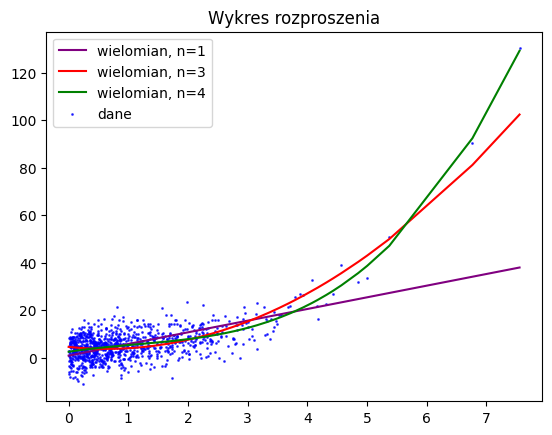

In [164]:
data1 = np.loadtxt("zad1_lista1.txt", dtype="float")
# x - zmienna objaśniająca, y - zmienna objaśniana
x, y = data1.T

# y_func = np.poly1d(np.polyfit(x, y, 3))
P1 = np.polyfit(x, y, 1)
P3 = np.polyfit(x, y, 2)
P4 = np.polyfit(x, y, 4)
# x_func = np.linspace(0,8,10**3)
y1 = np.polyval(P1, sorted(x))
y3 = np.polyval(P3, sorted(x))
y4 = np.polyval(P4, sorted(x))

# plt.plot(x_func, y_func(x_func), color='r', label='regresja liniowa')
plt.plot(sorted(x), y1, color='purple', label='wielomian, n=1')
plt.plot(sorted(x), y3, color='r', label='wielomian, n=3')
plt.plot(sorted(x), y4, color='green', label='wielomian, n=4')
plt.scatter(x, y, s=1, c='b', alpha=0.7, label='dane')
plt.legend()
plt.title('Wykres rozproszenia')
plt.show()


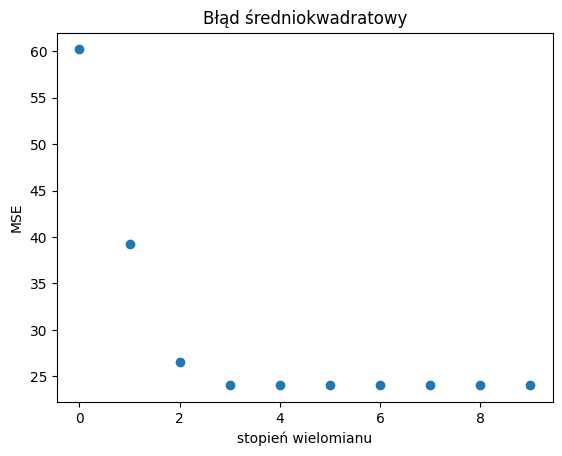

In [165]:
def mse_func(y,n):
    P = np.polyfit(x, y, n)
    y_ = np.polyval(P, x)
    MSE = skl.mean_squared_error(y, y_)
    return MSE

mse_list = []
for i in range(10):
    a = mse_func(y,i)
    mse_list.append(a)

plt.scatter(np.arange(0,10), mse_list)
plt.title('Błąd średniokwadratowy')
plt.xlabel('stopień wielomianu')
plt.ylabel('MSE')
plt.show()

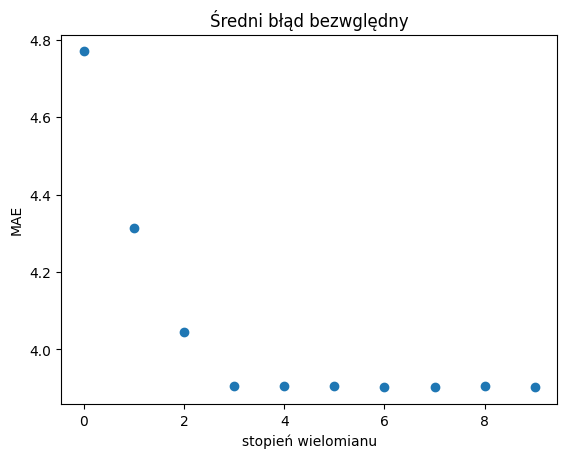

In [166]:
def mae_func(y,n):
    P = np.polyfit(x, y, n)
    y_ = np.polyval(P, x)
    MAE = skl.mean_absolute_error(y, y_)
    return MAE

mae_list = []
for i in range(10):
    a = mae_func(y,i)
    mae_list.append(a)

plt.scatter(np.arange(0,10), mae_list)
plt.title('Średni błąd bezwględny')
plt.xlabel('stopień wielomianu')
plt.ylabel('MAE')
plt.show()

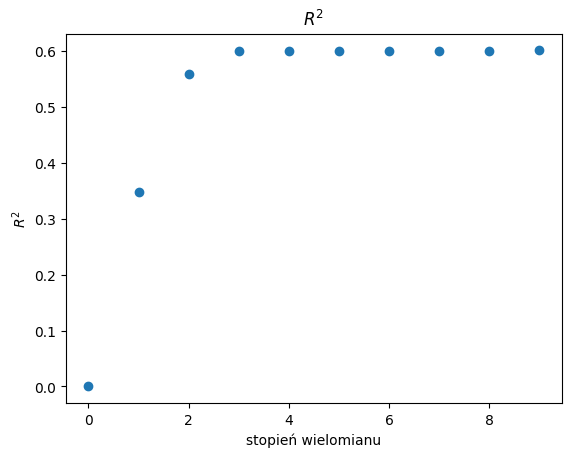

In [167]:
def r2_func(y,n):
    P = np.polyfit(x, y, n)
    y_ = np.polyval(P, x)
    r2 = skl.r2_score(y, y_)
    return r2

r2_list = []
for i in range(10):
    a = r2_func(y,i)
    r2_list.append(a)

plt.scatter(np.arange(0,10), r2_list)
plt.title(r'$R^2$')
plt.xlabel('stopień wielomianu')
plt.ylabel(r'$R^2$')
plt.show()

## Zadanie 2
Dane ze strony www wygładź wykorzystując prostą średnią ruchomą o podstawie 11, podstawie 25 oraz podstawie (2p+1) dla wybranej wielkości p. Wykonaj odpowiednie wykresy.

In [168]:
data2 = np.loadtxt("zad2_lista1.txt", dtype="float")
x_args = np.arange(len(data2))

In [169]:
def SMA(data, n):
    i = 0
    moving_averages = np.empty(len(data) - n + 1)
    while i < len(data) - n + 1:
        current_window = data[i:i+n]
        current_average = sum(current_window/n)
        moving_averages[i] = current_average
        i += 1
    return moving_averages


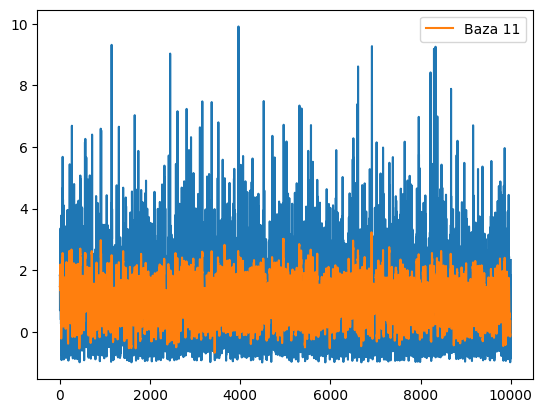

In [170]:
p = 11
plt.plot(x_args, data2)
plt.plot(SMA(data2, p), label = f'Baza {p}')
plt.legend()
plt.show()

In [171]:
def SMA_any_base(data, p):
    i = 0
    moving_averages = np.empty(len(data) - 2*p)     # - (2p+1) + 1
    while i < len(data) - 2*p:
        current_window = data[i:i+(2*p+1)]
        current_average = sum(current_window/(2*p+1))
        moving_averages[i] = current_average
        i += 1
    return moving_averages

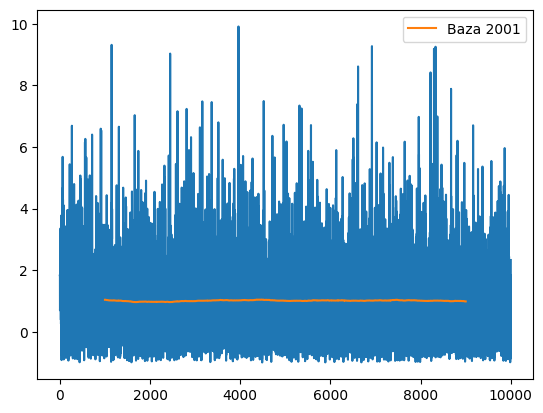

In [172]:
p = 1000
plt.plot(x_args, data2)
plt.plot(x_args[:-2*p]+p, SMA_any_base(data2, p), label=f'Baza {2*p + 1}')
plt.legend()
plt.show()

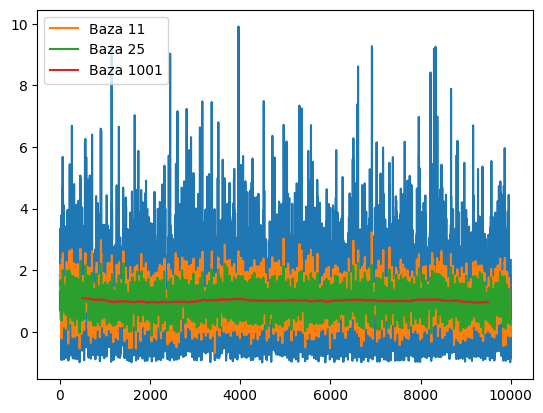

In [173]:
p = 5
plt.plot(x_args, data2)
plt.plot(x_args[:-2*p]+p, SMA_any_base(data2, p), label=f'Baza {2*p + 1}')

p = 12
plt.plot(x_args[:-2*p]+p, SMA_any_base(data2, p), label=f'Baza {2*p + 1}')

p = 500
plt.plot(x_args[:-2*p]+p, SMA_any_base(data2, p), label=f'Baza {2*p + 1}')

plt.legend()
plt.show()

## Zadanie 3
Na postawie danych z zadania 2 (zmienna objaśniająca) i danych z zadania 3 (zmienna objaśniana) wyznacz prostą regresji na podstawie metody najmniejszych kwadratów. Wykonaj to samo zadanie dla zmiennej objaśniającej, która została wygładzona za pomocą znanych metod. Wykonaj odpowiednie wykresy.

In [174]:
x = np.loadtxt("zad2_lista1.txt", dtype="float")
y = np.loadtxt("zad3_lista1.txt", dtype="float")

In [175]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

print(poly_fit(x,y))
print(np.polyfit(x,y,1))

(19.966464658199925, 5.226906171237232)
[19.96646466  5.22690617]


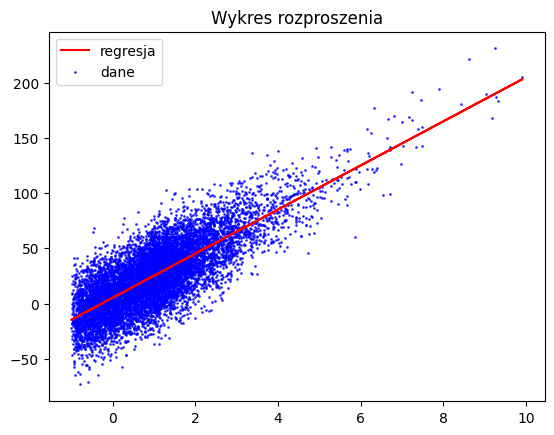

In [176]:
def func(x,a,b):
    return a*x + b

a, b = poly_fit(x,y)

f = func(x,a,b)

plt.plot(x, f, color='r', label='regresja')
plt.scatter(x, y, s=1, c='b', alpha=0.7, label='dane')
plt.legend()
plt.title('Wykres rozproszenia')
plt.show()

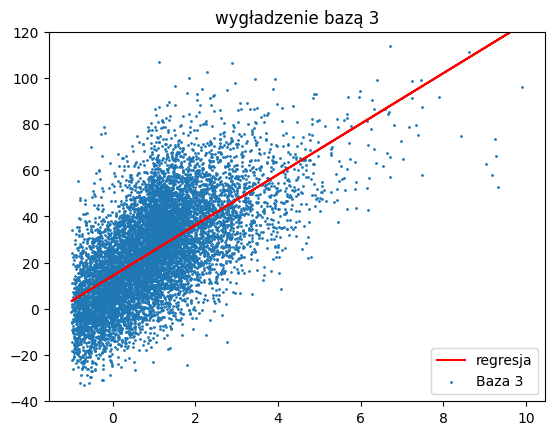

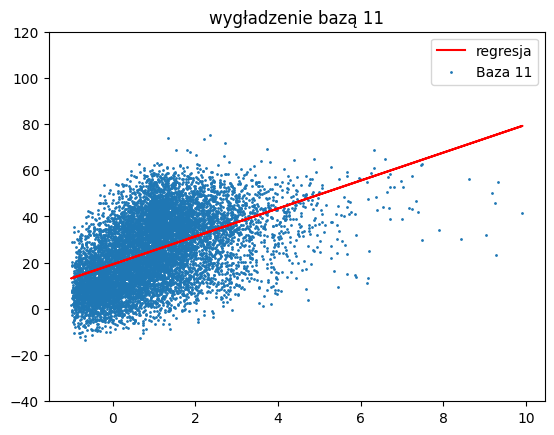

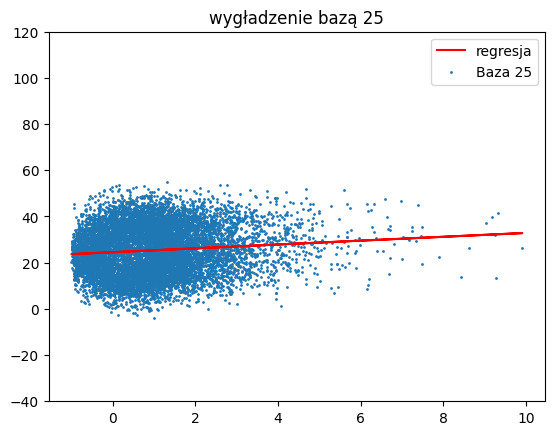

In [177]:
p = 1
y_3 = SMA_any_base(y, p)
a, b = poly_fit(x[:-2*p], y_3)
f = func(x,a,b)
plt.plot(x, f, color='r', label='regresja')
plt.scatter(x[:-2*p], y_3, s=1, label = f'Baza {2*p+1}')
plt.ylim(-40,120)
plt.legend()
plt.title(f'wygładzenie bazą {2*p+1}')
plt.show()

p = 5
y_11 = SMA_any_base(y, p)
a, b = poly_fit(x[:-2*p], y_11)
f = func(x,a,b)
plt.plot(x, f, color='r', label='regresja')
plt.scatter(x[:-2*p], y_11, s=1, label = f'Baza {2*p+1}')
plt.ylim(-40,120)
plt.legend()
plt.title(f'wygładzenie bazą {2*p+1}')
plt.show()

p = 12
y_25 = SMA_any_base(y, p)
a, b = poly_fit(x[:-2*p], y_25)
f = func(x,a,b)
plt.plot(x, f, color='r', label='regresja')
plt.scatter(x[:-2*p], y_25, s=1, label = f'Baza {2*p+1}')
plt.ylim(-40,120)
plt.legend()
plt.title(f'wygładzenie bazą {2*p+1}')
plt.show()

## Zadanie 4
Dla danych ze strony www wyznacz prostą regresji traktując pierwszą kolumnę jako zmien- ną objaśniającą, a drugą jako zmienną objaśnianą. Współczynniki prostej regresji wyznacz wykorzystując metodę najmniejszych kwadratów. Następnie wyznacz residua (błędy). Zapro- ponuj swoją metodę wyznaczania obserwacji odstających. Usuń je, a następnie jeszcze raz wyznacz prostą regresji.

In [178]:
data4 = np.loadtxt("zad4_lista1.txt", dtype="float")
# x - zmienna objaśniająca, y - zmienna objaśniana
x, y = data4.T

In [179]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

print(poly_fit(x,y))
print(np.polyfit(x,y,1))

(20.57883101428793, 5.285173853754355)
[20.57883101  5.28517385]


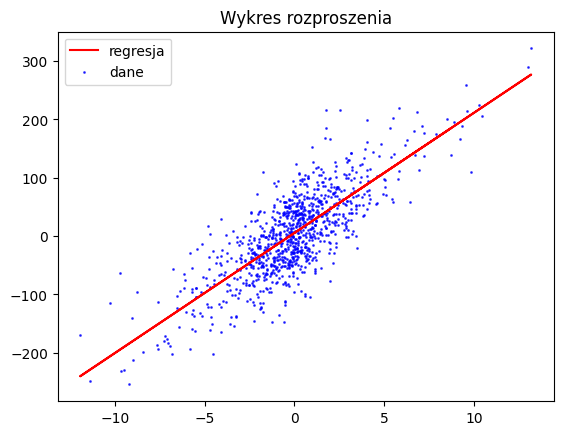

In [180]:
def func(x,a,b):
    return a*x + b

a, b = poly_fit(x,y)

f = func(x,a,b)

plt.plot(x, f, color='r', label='regresja')
plt.scatter(x, y, s=1, c='b', alpha=0.7, label='dane')
plt.legend()
plt.title('Wykres rozproszenia')
plt.show()

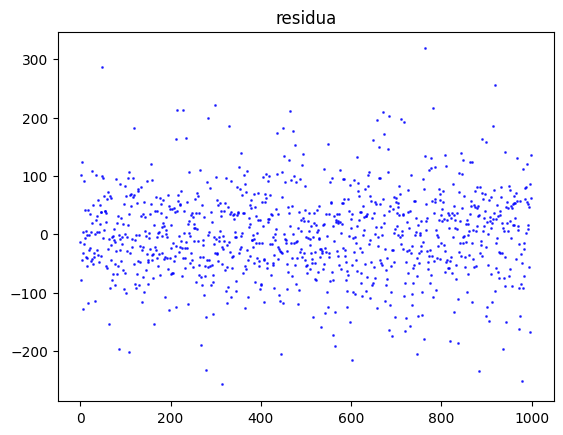

In [181]:
def e_i(y):
    return y - np.mean(y)

e = e_i(y)

plt.scatter(np.arange(len(e)), e, s=1, c='b', alpha=0.7)
plt.title('residua')
plt.show()

In [182]:
def odstajace(x, y):
    new_x = []
    new_y = []
    error_x = []
    error_y = []
    for i in range(len(x)):
        if abs(f[i] - e[i]) < 90:
            new_x.append(x[i])
            new_y.append(y[i])
        else:
            error_x.append(x[i])
            error_y.append(y[i])

    return new_x, new_y, error_x, error_y


20.707271328982323 5.585039806487002


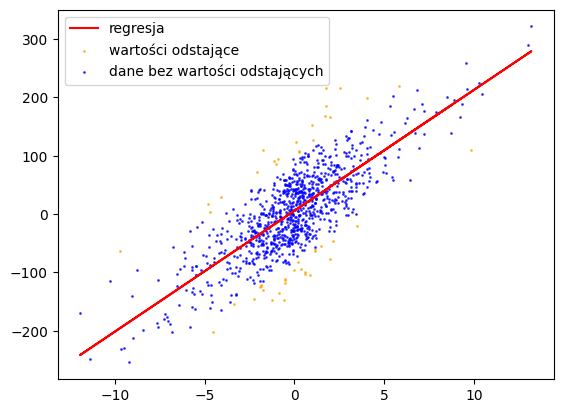

In [183]:
new_x, new_y, error_x, error_y = odstajace(x, y)
a4, b4 = poly_fit(np.array(new_x), np.array(new_y))
f4 = func(np.array(new_x), a4, b4)
print(a4, b4)

plt.plot(new_x, f4, color='r', label='regresja')
plt.scatter(error_x, error_y, s=1, c='orange', alpha=0.7, label='wartości odstające')
plt.scatter(new_x, new_y, s=1, c='b', alpha=0.7, label='dane bez wartości odstających')
plt.legend()
plt.show()

## Zadanie 5
Dla danych z zadania 4 wyznacz jeszcze raz prostą regresji wykorzystując jedynie 990 obserwacji. Następnie dokonaj predykcji dla obserwacji 991,...,1000 na podstawie zaproponowanej prostej. Wyznacz błędy predykcji.

In [184]:
data4 = np.loadtxt("zad4_lista1.txt", dtype="float")
# x - zmienna objaśniająca, y - zmienna objaśniana
x, y = data4.T

Dla 990 pierwszych obserwacji z posortowanej listy

In [185]:
x_copy = list(x.copy())
x_ = list(sorted(x))
x_predykcja = []        # x ostatnich 10 obserwacji
y_dane = []             # y ostatnich 10 obserwacji
x_5 = list(x.copy())    # x pierwszych 990 obserwacji
y_5 = list(y.copy())    # y pierwszych 990 obserwacji
for i in x_[990:]:
    index = x_copy.index(i)
    x_predykcja.append(i)
    y_dane.append(y[index])
    x_5.remove(i)
    y_5.remove(y[index])

x_predykcja = np.array(x_predykcja)
y_dane = np.array(y_dane)
x_5 = np.array(x_5)
y_5 = np.array(y_5)
    

(20.563945911726677, 5.291242398238033)


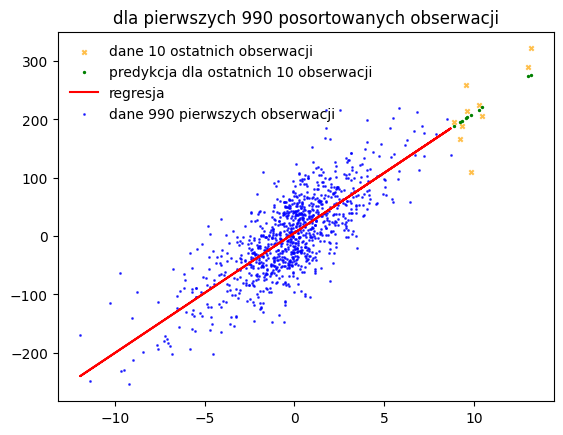

In [186]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

print(poly_fit(x_5,y_5))

def func(x,a,b):
    return a*x + b

a_5, b_5 = poly_fit(x_5, y_5)
f_5 = func(x_5, a_5, b_5)

y_predykcja = []      # y ostatnich 10 przewidywanych obserwacji
for i in x_predykcja:
    y_predykcja.append(func(i, a_5, b_5))

y_predykcja = np.array(y_predykcja)

plt.scatter(x_predykcja, y_dane, s=10, c='orange', marker='x', alpha=0.7, label='dane 10 ostatnich obserwacji')
plt.scatter(x_predykcja, y_predykcja, s=2, c='green', label='predykcja dla ostatnich 10 obserwacji')
plt.plot(x_5, f_5, color='r', label='regresja')
plt.scatter(x_5, y_5, s=1, c='b', alpha=0.7, label='dane 990 pierwszych obserwacji')
plt.legend(frameon=False)
plt.title('dla pierwszych 990 posortowanych obserwacji')
plt.show()

In [193]:
def e_i(y, y_):
    e = y - y_
    return e

def MAE_func(y, y_):
    # MAE = np.mean(abs(y - y_))
    MAE = skl.mean_absolute_error(y, y_)
    return MAE

def MSE_func(y, y_):
    MSE = skl.mean_squared_error(y, y_)
    return MSE

def r2_func(y, y_):
    r2 = skl.r2_score(y, y_)
    return r2

e = e_i(y_dane, y_predykcja)
print('błędy predykcji:', e)

print('\nDla próby testowej:')

mae_test = MAE_func(y_dane, y_predykcja)
print('średni błąd bezwzględny, MAE:', mae_test)

mse_test = MSE_func(y_dane, y_predykcja)
print('błąd średniokwadratowy, MSE:', mse_test)

r2_test = r2_func(y_dane, y_predykcja)
print('R^2:', r2_test)

print('\nDla próby treningowej:')

mae_trening = MAE_func(y_5, f_5)
print('średni błąd bezwzględny, MAE:', mae_trening)

mse_trening = MSE_func(y_5, f_5)
print('błąd średniokwadratowy, MSE:', mse_trening)

r2_trening = r2_func(y_5, f_5)
print('R^2:', r2_trening)

błędy predykcji: [  5.94440557 -28.1984895   -9.73445012  56.25042641  11.65133863
 -97.42641362   7.6590356  -15.46793251  16.90225803  44.80345867]

Dla próby testowej:
średni błąd bezwzględny, MAE: 29.40382086543861
błąd średniokwadratowy, MSE: 1630.7974518460999
R^2: 0.5117998459266453

Dla próby treningowej:
średni błąd bezwzględny, MAE: 36.764836038101826
błąd średniokwadratowy, MSE: 2098.2689337186625
R^2: 0.5852855336220697


Dla 990 pierwszych obserwacji z nieposortowanej listy

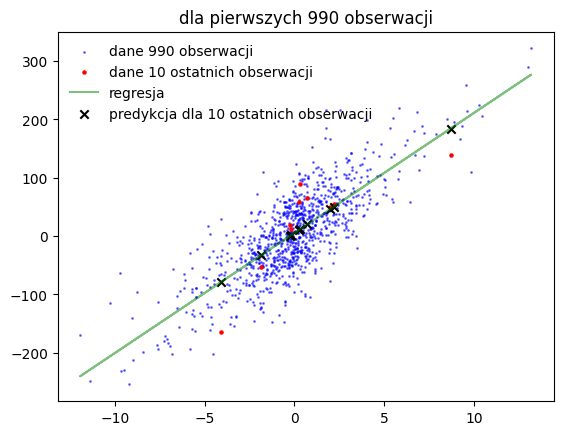

In [188]:
x_990 = x[:990]
y_990 = y[:990]
x_10 = x[990:]
y_10 = y[990:]

a_, b_ = poly_fit(x_990, y_990)
f_ = func(x_990, a_, b_)

y_10_predykcja = func(x_10, a_, b_)

plt.scatter(x_990, y_990, s=1, c='b', alpha=0.5, label='dane 990 obserwacji')
plt.scatter(x_10, y_10, s=5, c='red', label='dane 10 ostatnich obserwacji')
plt.plot(x_990, f_, color='green', alpha=0.5, label='regresja')
plt.scatter(x_10, y_10_predykcja, c='black', marker='x', label='predykcja dla 10 ostatnich obserwacji')
plt.title('dla pierwszych 990 obserwacji')
plt.legend(frameon=False)
plt.show()

In [194]:
e_ = e_i(y_10, y_10_predykcja)
print('błędy predykcji:', e_)

print('\nDla próby testowej:')

mae_test_ = MAE_func(y_10, y_10_predykcja)
print('średni błąd bezwzględny, MAE:', mae_test_)

mse_test_ = MSE_func(y_10, y_10_predykcja)
print('błąd średniokwadratowy, MSE:', mse_test_)

r2_test_ = r2_func(y_10, y_10_predykcja)
print('R^2:', r2_test_)

print('\nDla próby treningowej:')

mae_trening_ = MAE_func(y_990, f_)
print('średni błąd bezwzględny, MAE:', mae_trening_)

mse_trening_ = MSE_func(y_990, f_)
print('błąd średniokwadratowy, MSE:', mse_trening_)

r2_trening_ = r2_func(y_990, f_)
print('R^2:', r2_trening_)

błędy predykcji: [ 47.69182124  18.08146598  11.21722773   4.44187776   4.03625841
 -19.83391555 -84.46272399  76.68806156  44.35408611 -46.08330945]

Dla próby testowej:
średni błąd bezwzględny, MAE: 35.6890747778359
błąd średniokwadratowy, MSE: 2026.2648183297727
R^2: 0.6773700100453328

Dla próby treningowej:
średni błąd bezwzględny, MAE: 36.701512636191524
błąd średniokwadratowy, MSE: 2094.2762537603803
R^2: 0.6187291455546721


## Zadanie 6
Dla danych ze strony www zaproponuj funkcję zależności dla danych, następnie dokonaj ich transformacji i wykorzystując regresję liniową znajdź prostą opisującą przetransformowane dane.

In [195]:
data6 = np.loadtxt("zad6_lista1.txt", dtype="float")
x, y = data6.T

(1.1869261103422113, 1.1904809318009153)


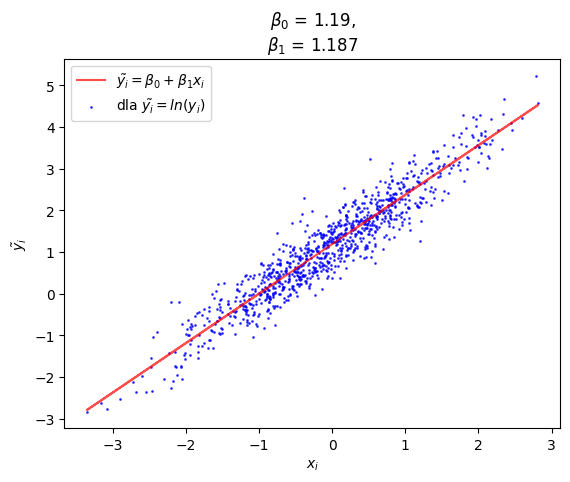

In [200]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

# y = a exp(bx)
# ln(y) = ln(a) + bx
# y_ = beta_0 + beta_1 x
y_ = np.log(y)
print(poly_fit(x,y_))

def func(x,a,b):
    return a*x + b

beta_1, beta_0 = poly_fit(x,y_)
f_6 = func(x, beta_1, beta_0)

plt.plot(x, f_6, c='r', alpha=0.7, label=r'$\tilde{y_i} = \beta_0 + \beta_1 x_i$')
plt.scatter(x, y_, s=1, c='b', alpha=0.7, label=r'dla $\tilde{y_i} = ln(y_i)$')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$\tilde{y_i}$')
plt.legend()
plt.title(r'$\beta_0$ ' + f'= {round(beta_0,3)},\n' + r'$\beta_1$ ' f'= {round(beta_1,3)}')
plt.show()

3.2886624494722647 1.1869261103422113


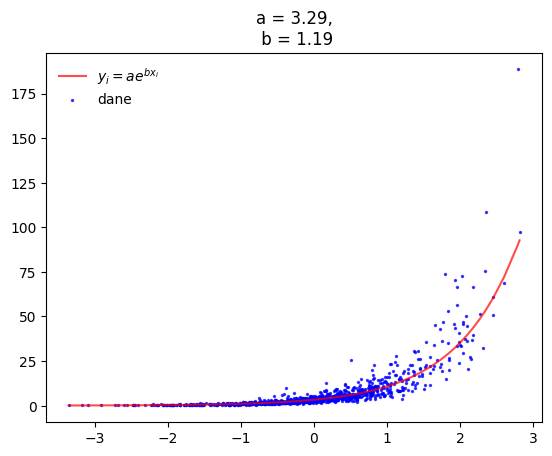

In [209]:
a_6 = np.exp(beta_0)
b_6 = beta_1
print(a_6, b_6)

def func_e(x,a,b):
    return a*np.exp(b*x)

# x_ = np.linspace(-3,3,10**4)
f_6 = func_e(np.array(sorted(x)), a_6, b_6)

plt.plot(sorted(x), f_6, c='r', alpha=0.7, label=r'$y_i = ae^{bx_i}$')
plt.scatter(x, y, s=2, c='b', alpha=0.7, label='dane')
plt.legend(frameon=False)
plt.title(f'a = {round(a_6,2)},\n b = {round(b_6,2)}')
plt.show()